# In this notebook we calculate various macroscopic quantities of the raw Ising configurations, and in addition we use the binder ratio method to calculate the critical temperature

In [1]:

import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import numpy as np  # package for arrays
import matplotlib.pyplot as plt  # package for plotting
from time import time 
import random as ran

In [2]:
'''

Tcs are:

x=1 : 2.269
x=0.9 : 1.9
x=0.8 : 1.5
x=0.7 : 1.05
x=0.6 : 0.2

'''

'\n\nTcs are:\n\nx=1 : 2.269\nx=0.9 : 1.9\nx=0.8 : 1.5\nx=0.7 : 1.05\nx=0.6 : 0.2\n\n'

In [3]:
def get_details(y):
    temps = set(y)
    temps = np.sort(np.array(list(temps)))
    np.sort([1,])
    Tcount = {}
    for kT in temps:
        Tcount[kT] = np.count_nonzero(y==kT)
    return Tcount

def order_data(y, X):
    indices = np.argsort(y)
    y = y[indices]
    X = X[indices]
    return (y, X)

def reconstruct_lattice(lattice):
    L = round(np.sqrt(len(lattice)))
    return np.reshape(lattice, (L,L))

def show_state(state, save=False):
    img = reconstruct_lattice(state)
    fig, ax = plt.subplots()
    ax.imshow(img, cmap=plt.get_cmap('gray'), interpolation="nearest")
    if save != False:
        fig.savefig(save)
    
def load_data(method, L, x):
    path = 'data/'+method+'/L='+str(L)+'_x='+str(x)
    X = np.loadtxt(path+'_X.txt') 
    y = np.loadtxt(path+'_y.txt') 

    y, X = order_data(y, X)
    return y, X

### Data

In [221]:
x = 1

y50, X50 = load_data(method='up_down', L=50, x=x)
y40, X40 = load_data(method='up_down', L=40, x=x)
y30, X30 = load_data(method='up_down', L=30, x=x)

print(y40.shape)
get_details(y50)

(4920,)


{1.5: 85,
 1.6: 84,
 1.7: 97,
 1.8: 80,
 1.9: 101,
 2.0: 83,
 2.1: 94,
 2.2: 82,
 2.3: 89,
 2.4: 87,
 2.5: 89,
 2.6: 81,
 2.7: 110,
 2.8: 84,
 2.9: 80,
 3.0: 100,
 3.1: 74}

In [222]:
M = 9999999999
index = 0
for i,state in enumerate(X50[:400]):
    m = np.abs(np.sum(state))
    if m<M:
        M=m
        index = i
index

356

3.1

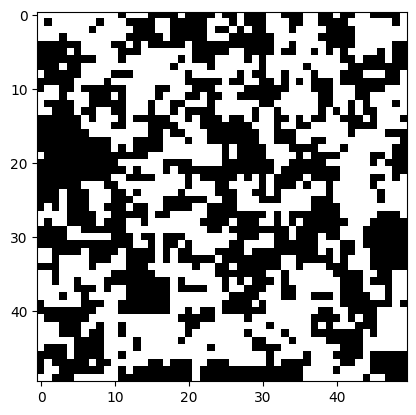

In [223]:
i = 71
i = 360

i = 800
i = -3

path = f'results/dilute_ising/x=1_T={y50[i]}.png'
show_state(X50[i], save=False)
y50[i]

Text(0.5, 1.0, '(c): $T = 3.1$')

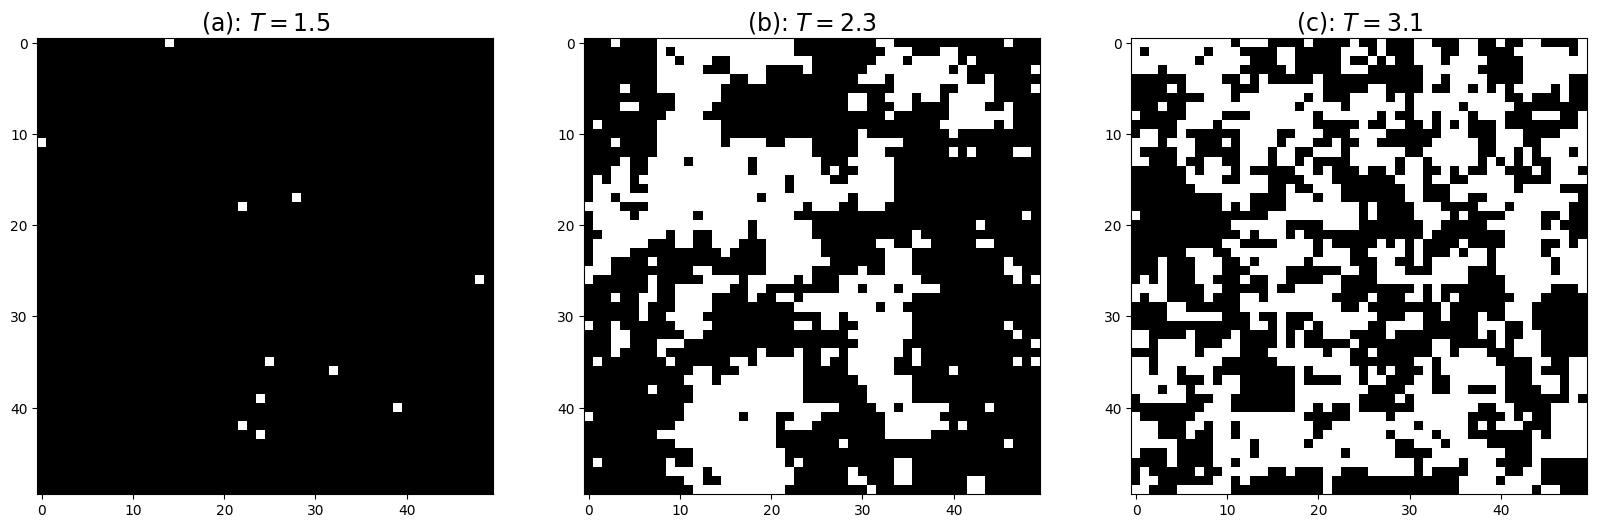

In [225]:


fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20,6))

i = 3
i = 761
i = -3

i = 71 # 0.7
i = 800 # 1.6
i = -1

img1 = reconstruct_lattice(X50[3])
img2 = reconstruct_lattice(X50[761])
img3 = reconstruct_lattice(X50[-3])

axs[0].imshow(img1, cmap=plt.get_cmap('gray'), interpolation="nearest")
axs[1].imshow(img2, cmap=plt.get_cmap('gray'), interpolation="nearest")
axs[2].imshow(img3, cmap=plt.get_cmap('gray'), interpolation="nearest")

axs[0].set_title(r'(a): $T = 1.5$', fontsize=17)
axs[1].set_title(r'(b): $T = 2.3$', fontsize=17)
axs[2].set_title(r'(c): $T = 3.1$', fontsize=17)

In [226]:
# fig.savefig('results/dilute_ising/figures/pureStates.png')

### Mean absolute value + error bars

In [7]:
def mean_absolute(y, values, central_limit=True):
    print(np.array(y).shape)
    temperatures = list(set(y))
    
    means = []
    errs = []
    for kT in temperatures:
        filt = y==kT
        samples = values[filt]
        N_samples = len(samples)
        
        samples = np.abs(samples)
        mean = np.mean(samples)
        if central_limit:
            err = np.std(samples)/np.sqrt(N_samples)
        else:
            err = np.std(samples)
        
        errs.append(err)
        means.append(mean)
        
    return temperatures, means, errs
    
def reorder(temperatures, values, errs='None'):
    temperatures = np.array(temperatures)
    values = np.array(values)
    errs = np.array(errs)
    
    indices = np.argsort(temperatures)
    
    if errs != 'None':
        return temperatures[indices], values[indices], errs[indices]
    
    return temperatures[indices], values[indices]

def get_mean_errs(values, central_limit=True):
    mean = np.mean(values)
    if central_limit:
        err = np.std(values)/np.sqrt(len(values))
    else:
        err = np.std(values)
    return mean, err

# Magnetisation


In [8]:
def magnetisation(state):
    N = np.count_nonzero(state)
    return np.sum(state)/N

def mags(states):
    m = []
    for state in states:
        m.append(magnetisation(state))
    return np.array(m)

def get_m(X, y):
    m = mags(X)
    T, M, err = mean_absolute(y, m, central_limit=True)
    T, M, err = reorder(T, M, err)
    return T, M, err

In [9]:
r'$k=2$'

'$k=2$'

(1500,)


/var/folders/v_/fs61ry8x6h9dg62cykggbxh00000gn/T/ipykernel_89393/2245653932.py:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if errs != 'None':


Text(0.5, 0, 'T')

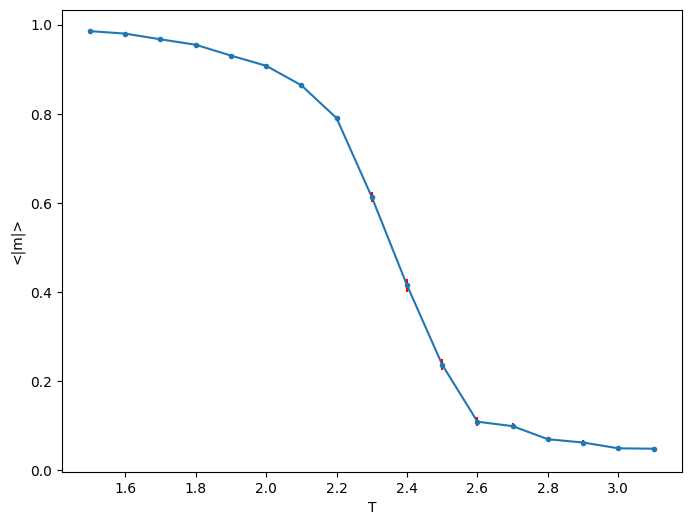

In [10]:
fig, ax = plt.subplots(figsize=(8,6))

T50, M50, err50 = get_m(X50, y50)

ax.plot(T50, M50, color='C0')
ax.errorbar(T50, M50, yerr=err50, fmt='.', color='C0', ecolor='red')

# ax.set_title('Magnetisation vs Temperature for L=40')
ax.set_ylabel('<|m|>')
ax.set_xlabel('T')

In [11]:
# fig.savefig('./results/dilute_ising/[1]/Magnetisation.png')

(2010,)
(4920,)
(1500,)


/var/folders/v_/fs61ry8x6h9dg62cykggbxh00000gn/T/ipykernel_89393/2245653932.py:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if errs != 'None':


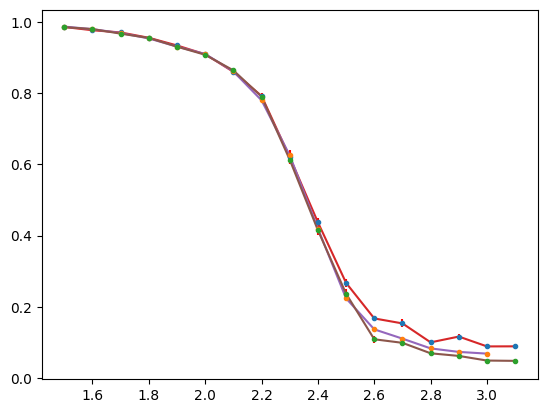

In [12]:
T30, M30, err30 = get_m(X30, y30)
T40, M40, err40 = get_m(X40, y40)
T50, M50, err50 = get_m(X50, y50)

plt.errorbar(T30, M30, yerr=err30, fmt='.', ecolor='red')
plt.errorbar(T40, M40, yerr=err40, fmt='.', ecolor='red')
plt.errorbar(T50, M50, yerr=err50, fmt='.', ecolor='red')

plt.plot(T30, M30)
plt.plot(T40, M40)
plt.plot(T50, M50)

# Magnetic susceptibility 

$$ \chi = \frac{1}{k_B T} \left( \langle m^2 \rangle - \langle |m| \rangle^2 \right) $$

idk if the absolute is true there

x_err = sqrt((s_err/a_err)^2 + (2a/kT)^2*a_err^2)

In [13]:


def susceptibility(values, y):
    temperatures = list(set(y))
    squares = values**2
    absolutes = np.abs(values) # aboslutes to the power of p
    
    CHI = []
    ERRs = []
    for kT in temperatures:
        filt = y==kT
        squares_ = squares[filt]
        absolutes_ = absolutes[filt]
        
        measurements = 10
        interval = round(len(squares_)/measurements)
        chis = []
        for i in range(measurements):
            s, s_err = get_mean_errs(squares_[i:(i+1)*interval]) # this may cause an issue on the last one. it may be out of range
            a, a_err = get_mean_errs(absolutes_[i:(i+1)*interval])
            x = (s - a**2)/kT
            chis.append(x)
        
        chi, err = get_mean_errs(chis)
        
        CHI.append(chi)
        ERRs.append(err)
               
    return CHI, ERRs

def get_susceptibility(y, X):
    T = list(set(y))
    m = mags(X)
    CHI, ERRs = susceptibility(m, y)
    T, CHI, ERRs = reorder(T, CHI, ERRs)
    
    return T, CHI, ERRs

/var/folders/v_/fs61ry8x6h9dg62cykggbxh00000gn/T/ipykernel_89393/2245653932.py:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if errs != 'None':


Text(0.5, 0, 'T')

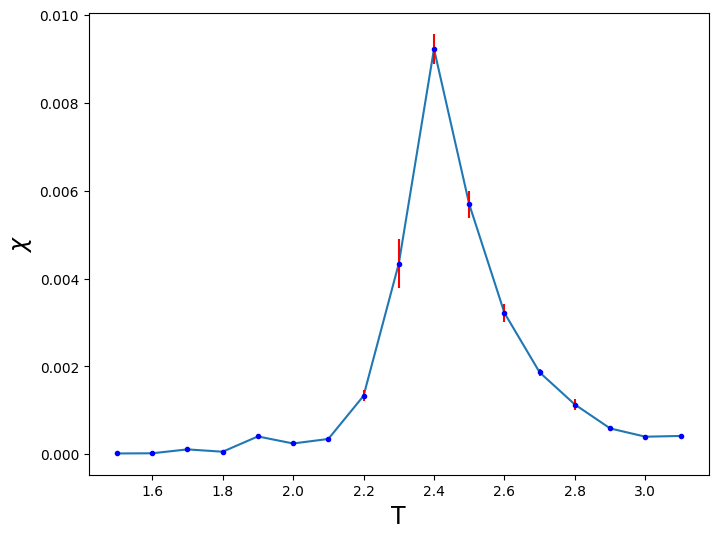

In [14]:
T50, CHI50, E50 = get_susceptibility(y50, X50)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(T50, CHI50)
ax.errorbar(T50, CHI50, yerr=E50, fmt='.', color='blue', ecolor='red')

ax.set_ylabel(r'$\chi$', fontsize=17)
ax.set_xlabel('T', fontsize=17)

Text(0.1, 0.9, '(b)')

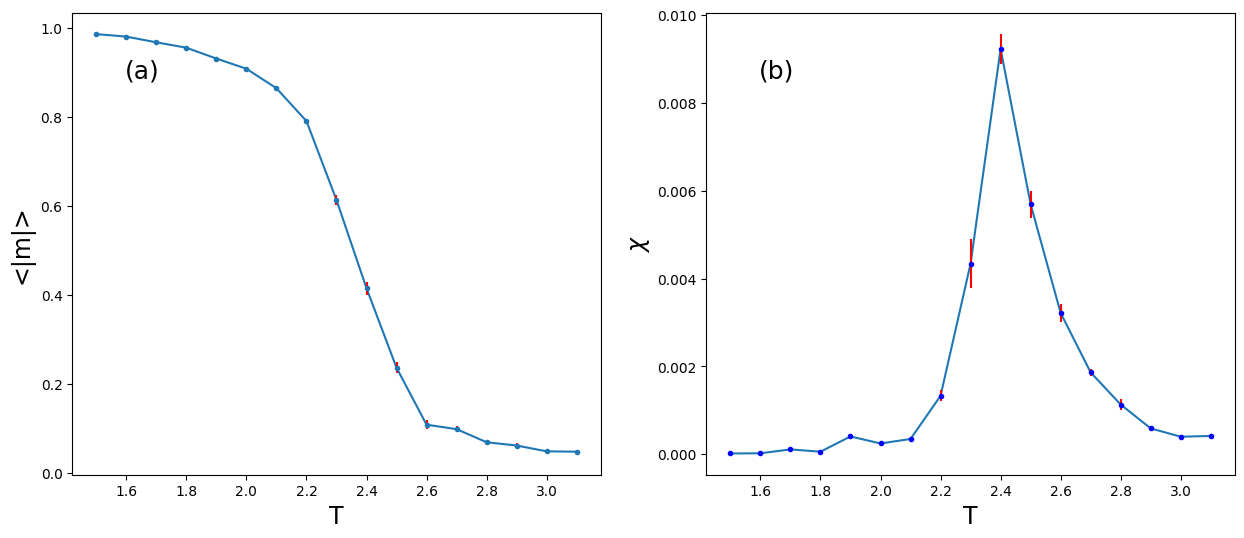

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

axs[0].plot(T50, M50, color='C0')
axs[0].errorbar(T50, M50, yerr=err50, fmt='.', color='C0', ecolor='red')
axs[0].set_ylabel('<|m|>', fontsize=17)
axs[0].set_xlabel('T', fontsize=17)

axs[1].plot(T50, CHI50)
axs[1].errorbar(T50, CHI50, yerr=E50, fmt='.', color='blue', ecolor='red')
axs[1].set_ylabel(r'$\chi$', fontsize=17)
axs[1].set_xlabel('T', fontsize=17)

axs[0].text(0.1, 0.9, "(a)", transform=axs[0].transAxes, fontsize=18, va='top')
axs[1].text(0.1, 0.9, "(b)", transform=axs[1].transAxes, fontsize=18, va='top')

In [16]:
# fig.savefig('./results/dilute_ising/[1]/macro_variables.png')

# Specific Heat

$$ C_v = \sigma_E^2/T^2 $$

where $\sigma_E$ is the std of the energy

Note: we are setting k=1 and J=1

In [17]:
def energy(state):
    # reconstruct shape
    N = len(state)
    L = round(np.sqrt(N))
    state = np.reshape(state, (L,L))
    
    J = 1 # this is what it is for everything
    
    E = 0
    for i,row in enumerate(state):
        for j,spin in enumerate(row):
            
            
            NNa = state[(i-1, j)] # Nearest neighbor above
            NNl = state[(i, j-1)] # Nearest neighbor left
            if i == L-1:
                NNb = state[(0, j)]
            else:
                NNb = state[(i+1, j)]
            if j == L-1:
                NNr = state[(i, 0)]
            else:
                NNr = state[(i, j+1)]
            
            E -= J*spin*(NNb + NNa + NNl + NNr)
    
    return E/2 # we counted each connection twice so we need to divide the energy by 2

def energies(X):
    H = []
    for state in X:
        H.append(energy(state))
    return np.array(H)

def specific_heat(y, energies):
    temperatures = list(set(y))
    
    Cv = []
    for T in temperatures:
        filt = y==T
        energies_ = energies[filt]
        sigma = np.std(energies_)
        Cv.append((sigma/T)**2)
        
    return Cv

def get_Cv(y, X):
    H = energies(X)
    Cv = specific_heat(y, H)
    T = list(set(y))
    
    return T, Cv

In [566]:
T30, Cv30 = get_Cv(y30, X30)
T40, Cv40 = get_Cv(y40, X40)
T50, Cv50 = get_Cv(y50, X50)

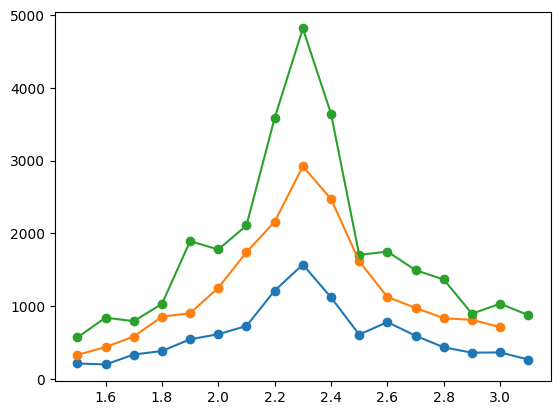

In [567]:
T30, Cv30 = reorder(T30, Cv30)
T40, Cv40 = reorder(T40, Cv40)
T50, Cv50 = reorder(T50, Cv50)

plt.scatter(T30, Cv30)
plt.scatter(T40, Cv40)
plt.scatter(T50, Cv50)

plt.plot(T30, Cv30)
plt.plot(T40, Cv40)
plt.plot(T50, Cv50)

# Binder ratios

In [26]:
def binder(y, values, p=1):
    temperatures = list(set(y))
    squares = values**(2*p)
    absolutes = np.abs(values)**p # aboslutes to the power of p
    
    Q = []
    ERRs = []
    for kT in temperatures:
        filt = y==kT
        squares_ = squares[filt]
        absolutes_ = absolutes[filt]
        
        measurements = 10
        interval = round(len(squares_)/measurements)
        qs = []
        for i in range(measurements):
            s, s_err = get_mean_errs(squares_[i:(i+1)*interval]) # this may cause an issue on the last one. it may be out of range
            a, a_err = get_mean_errs(absolutes_[i:(i+1)*interval])
            q = s/(a**2)
            qs.append(q)
        
        q, err = get_mean_errs(qs, central_limit=True)
        if kT==2.6 or kT==2.7:
            print(qs)
            print('')
        
        Q.append(q)
        ERRs.append(err)
    
    return Q, ERRs 

def get_binder(y, X):
    T = list(set(y))
    m = mags(X)
    Q, errs = binder(y, m)
#     T, Q, errs = reorder(T, Q, errs)
    
    return T, Q, errs

[1.8286560999196844, 1.8066008089430041, 1.933603819822176, 1.7918779367736704, 1.6576055315570442, 1.6131401680615525, 1.6967616814960835, 1.6709710915142615, 1.6701436613288927, 1.6765638806502556]

[1.721722454454438, 1.6276578489708022, 1.504594424477971, 1.4816185420967782, 1.4271186895360732, 1.4601511618970553, 1.5053143637584652, 1.5025735170598573, 1.5073852367220015, 1.491946103931235]

[1.3430685857467513, 1.4956957598177723, 1.5369518897938743, 1.5680033912273774, 1.5588536784073799, 1.565164981733434, 1.5550568262850175, 1.5340092207868932, 1.5494792334683953, 1.5511031919942628]

[1.4817433077576538, 1.518607763144325, 1.5019851999465583, 1.4753889407637286, 1.5227644796131334, 1.5103716151733397, 1.5227394157725744, 1.513006128396185, 1.5122686437323152, 1.5276916478805216]

[1.3177057460552584, 1.3257360364616888, 1.4171942541503462, 1.452693151406657, 1.4414430594157883, 1.4725624102248254, 1.477271582606478, 1.5267464696272597, 1.5373324603188276, 1.5101870184605244]


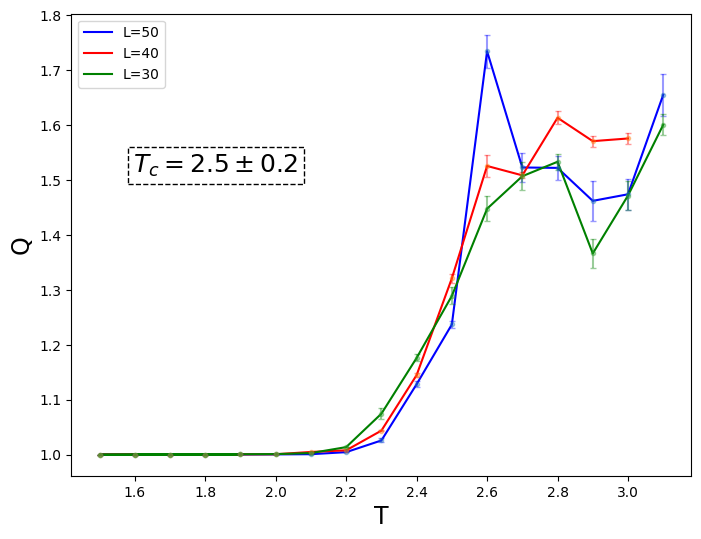

In [27]:
T50, Q50, E50 = get_binder(y50, X50)
T40, Q40, E40 = get_binder(y40, X40)
T30, Q30, E30 = get_binder(y30, X30)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(T50, Q50, label='L=50', color='blue')
ax.plot(T40, Q40, label='L=40', color='red')
ax.plot(T30, Q30, label='L=30', color='green')
ax.errorbar(T50, Q50, yerr=E50, fmt='.', ecolor='blue', capsize=2, alpha=0.4)
ax.errorbar(T40, Q40, yerr=E40, fmt='.', ecolor='red', capsize=2, alpha=0.4)
ax.errorbar(T30, Q30, yerr=E30, fmt='.', ecolor='green', capsize=2, alpha=0.4)

ax.set_ylabel('Q', fontsize=17)
ax.set_xlabel('T', fontsize=17)
ax.legend()

# ax.text(0.1, 0.7, "Tc = ", transform=ax.transAxes, fontsize=18, va='top')

text = ax.text(0.1, 0.7, r"$T_c = 2.5 \pm 0.2 $", transform=ax.transAxes, fontsize=18, va='top',
               bbox=dict(facecolor='none', edgecolor='black', linestyle='--', linewidth=1))

In [668]:
# fig.savefig('./results/dilute_ising/[1]/binder_errs.png')

In [658]:
def crossing(a1, b1, a2, b2, ta, tb):
    m1 = (b1-a1)/(tb-ta)
    m2 = (b2-a2)/(tb-ta)
    
    c1 = b1 - tb*(a1-b1)/(ta-tb)
    c2 = b2 - tb*(a2-b2)/(ta-tb)
    
    t = (c2-c1)/(m1-m2)
    
    y_ = m1*t + c1
    
    return (t, y_)

def find_crossings(T1, Q1, E1, T2, Q2, E2, left_index):
    il = left_index
    ir = il + 1
    
    ta = T1[il]
    tb = T1[ir]
    
    a1up = Q1[il] + E1[il]
    b1up = Q1[ir] + E1[ir]
    a1down = Q1[il] - E1[il]
    b1down = Q1[ir] - E1[ir]
    
    a2up = Q2[il] + E2[il]
    b2up = Q2[ir] + E2[ir]
    a2down = Q2[il] - E2[il]
    b2down = Q2[ir] - E2[ir]
    
    crossing_1 = crossing(a1up, b1up, a2down, b2down, ta, tb)
    crossing_2 = crossing(a1down, b1down, a2up, b2up, ta, tb)
    
    return crossing_1, crossing_2

We see the L=50 crossings are between 2.5 and 2.6



In [659]:
(Tc1, _), (Tc2, _) = find_crossings(T50, Q50, E50, T40, Q40, E40, 10)
(Tc3, _), (Tc4, _) = find_crossings(T50, Q50, E50, T30, Q30, E30, 10)
(Tc5, _), (Tc6, _) = find_crossings(T40, Q40, E40, T30, Q30, E30, 9)

Tc_s = np.array([Tc1, Tc2, Tc3, Tc4, Tc5, Tc6])

In [660]:
err = (max(Tc_s) - min(Tc_s))/2
Tc = np.mean(Tc_s)

print(Tc)
print(err)

2.54345960337325
0.16427627530284217


In [1]:
print('Critical Temperature: 2.51 +- 0.06')

Critical Temperature: 2.51 +- 0.06
